In [34]:
import numpy as np
import matplotlib as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pathlib
import datetime
from   datetime import datetime
import seaborn as sns
import missingno as msno
import warnings
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

In [35]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
dataframe = pd.read_csv("../data/Sep.csv")

In [37]:
dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,26057.0,Home in Copenhagen · 4.91 · 4 bedrooms · 4 be...,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2900,5,59,2022/8/9,0.49,1,353,0,NaN
1,26473.0,Townhouse in Copenhagen · 4.55 · 6 bedrooms ·...,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3350,3,338,2023/9/3,2.14,8,132,36,NaN
2,29118.0,Rental unit in Copenhagen · 4.85 · 1 bedroom ...,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,26,2023/7/18,0.16,1,37,2,NaN
3,31094.0,Condo in Copenhagen · 4.88 · 4 bedrooms · 2 b...,129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022/8/22,0.12,1,0,0,NaN
4,113508.0,Rental unit in Frederiksberg · 4.96 · 2 bedro...,577366,Ronnie,NaN,Frederiksberg,55.677570,12.556080,Entire home/apt,3536,2,50,2023/9/11,0.35,1,270,26,NaN


<Axes: >

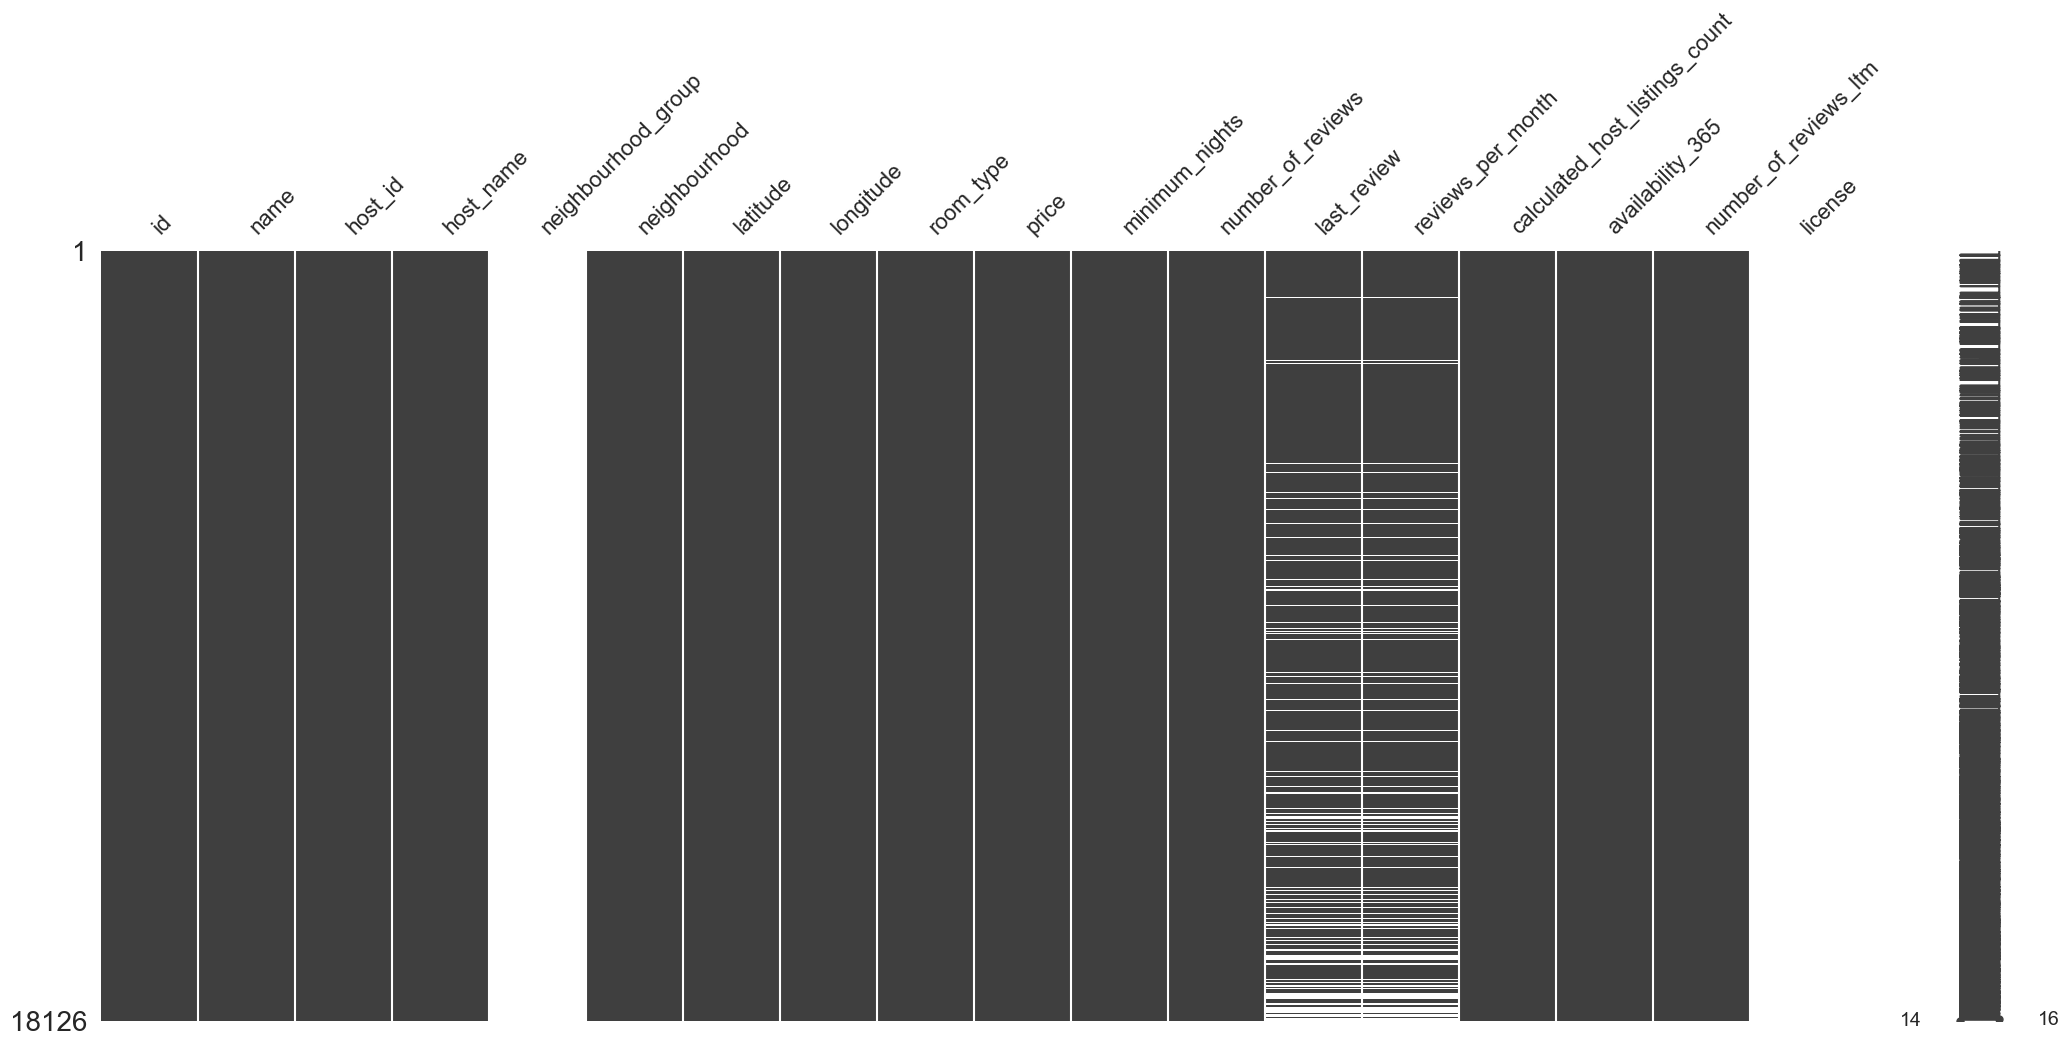

In [38]:
msno.matrix(dataframe)

In [39]:
dataframe = dataframe.drop(['neighbourhood_group'], axis=1)

In [40]:
dataframe = dataframe.drop(["license"], axis=1)

<Axes: >

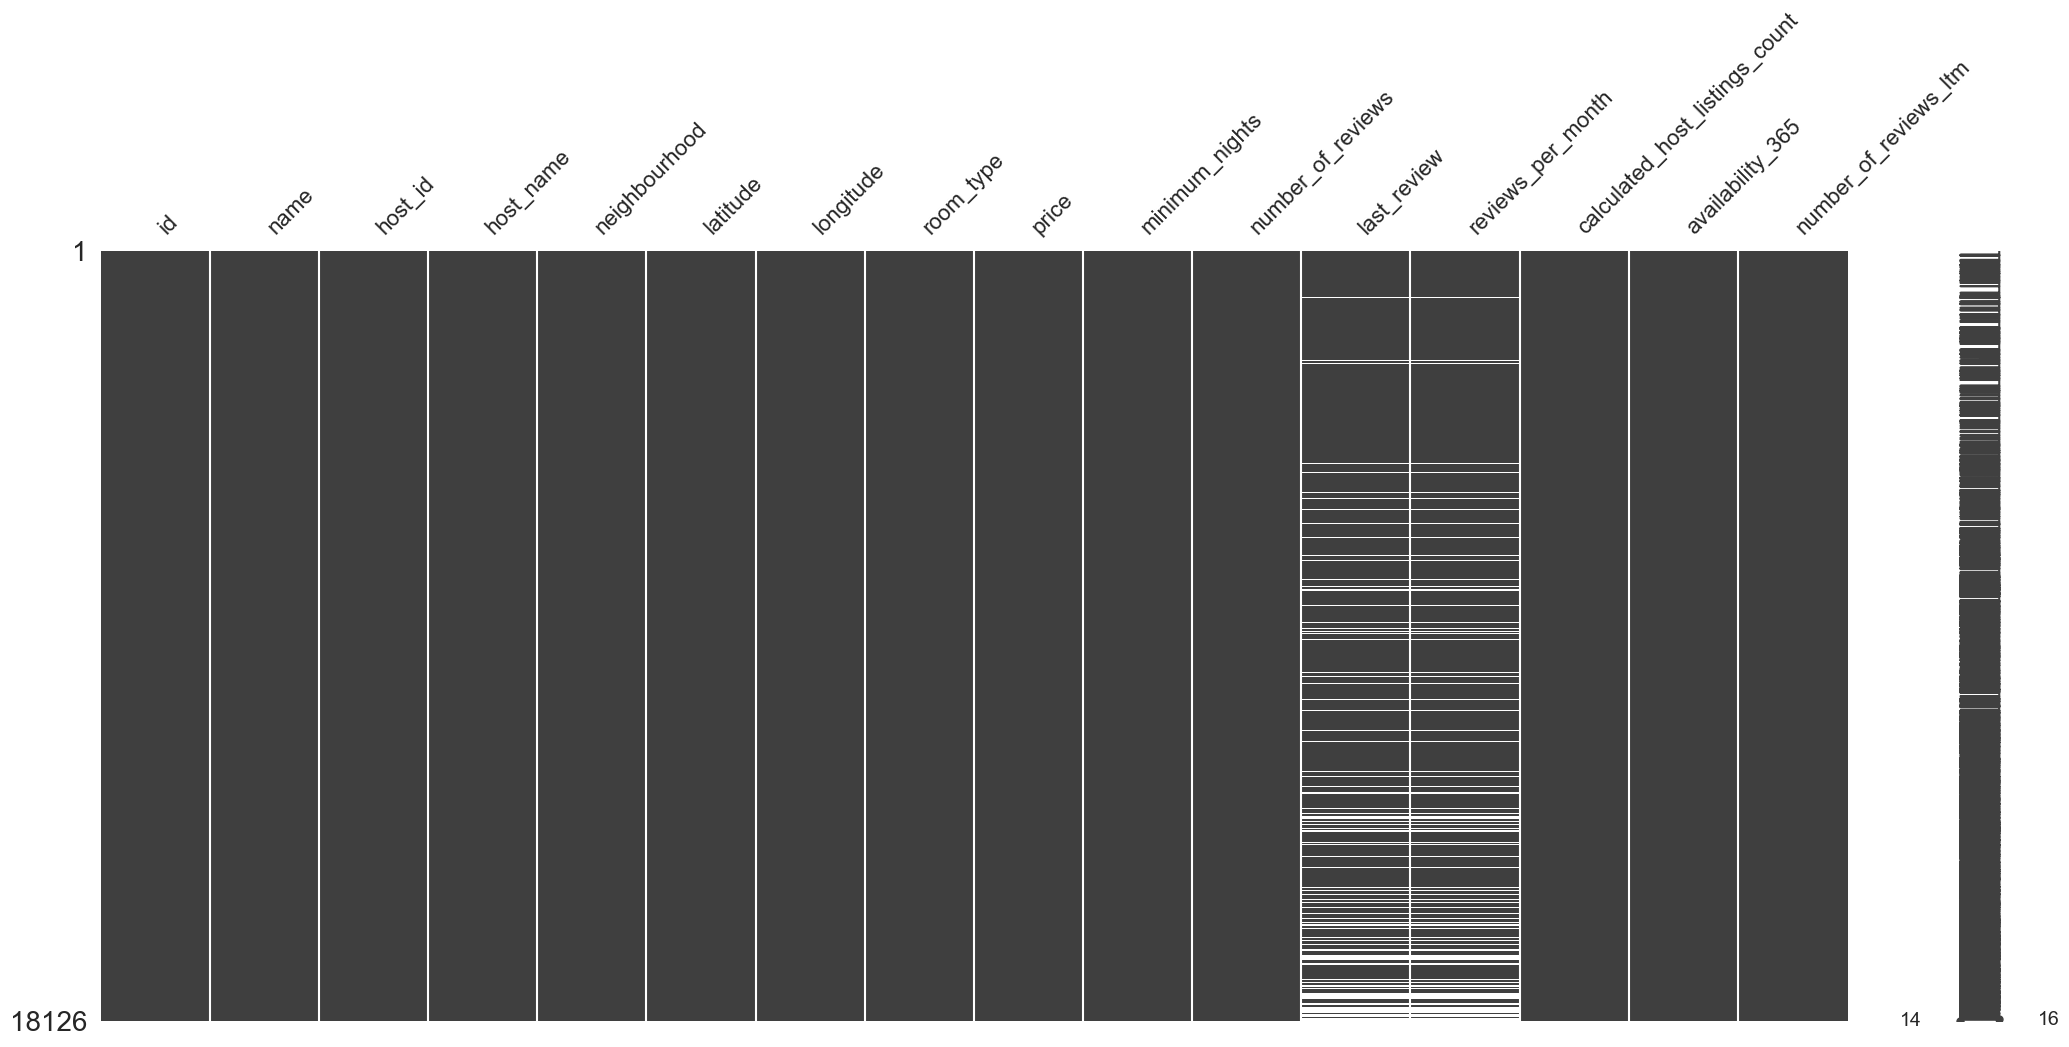

In [41]:
msno.matrix(dataframe)

In [42]:
dataframe["neighbourhood"].unique()

array(['Indre By', 'Vesterbro-Kongens Enghave', 'Frederiksberg',
       'sterbro', 'Nrrebro', 'Amager Vest', 'Amager st', 'Valby',
       'Vanlse', 'Bispebjerg', 'Brnshj-Husum'], dtype=object)

In [43]:
dataframe['neighbourhood'] = dataframe['neighbourhood'].str.replace("Nrrebro", "Nørrebro")
dataframe['neighbourhood'] = dataframe['neighbourhood'].str.replace("sterbro", "Vesterbro")
dataframe['neighbourhood'] = dataframe['neighbourhood'].str.replace("Vanlse", "Vanløse")
dataframe['neighbourhood'] = dataframe['neighbourhood'].str.replace("Brnshj-Husum", "Brønshøj-Husum")
dataframe['neighbourhood'] = dataframe['neighbourhood'].str.replace("VeVesterbro-Kongens Enghave", "Vesterbro-Kongens Enghave")


In [44]:
dataframe["neighbourhood"].unique()

array(['Indre By', 'Vesterbro-Kongens Enghave', 'Frederiksberg',
       'Vesterbro', 'Nørrebro', 'Amager Vest', 'Amager st', 'Valby',
       'Vanløse', 'Bispebjerg', 'Brønshøj-Husum'], dtype=object)

In [45]:
attr1 = ('&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')
tiles1 = 'https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png'

attr2 = ('&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')
tiles2 = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png'



In [46]:
import folium.raster_layers


lats = dataframe['latitude'].tolist()
lons = dataframe['longitude'].tolist()
locations = list(zip(lats, lons))
mean_lat = dataframe['latitude'].mean()
mean_long = dataframe['longitude'].mean()

map1 = folium.Map(location=[mean_lat, mean_long], zoom_start=11.5, tiles=tiles2, attr=attr2)
FastMarkerCluster(data=locations).add_to(map1)

map1
# map1.save("sb-alt-folium.map.html")

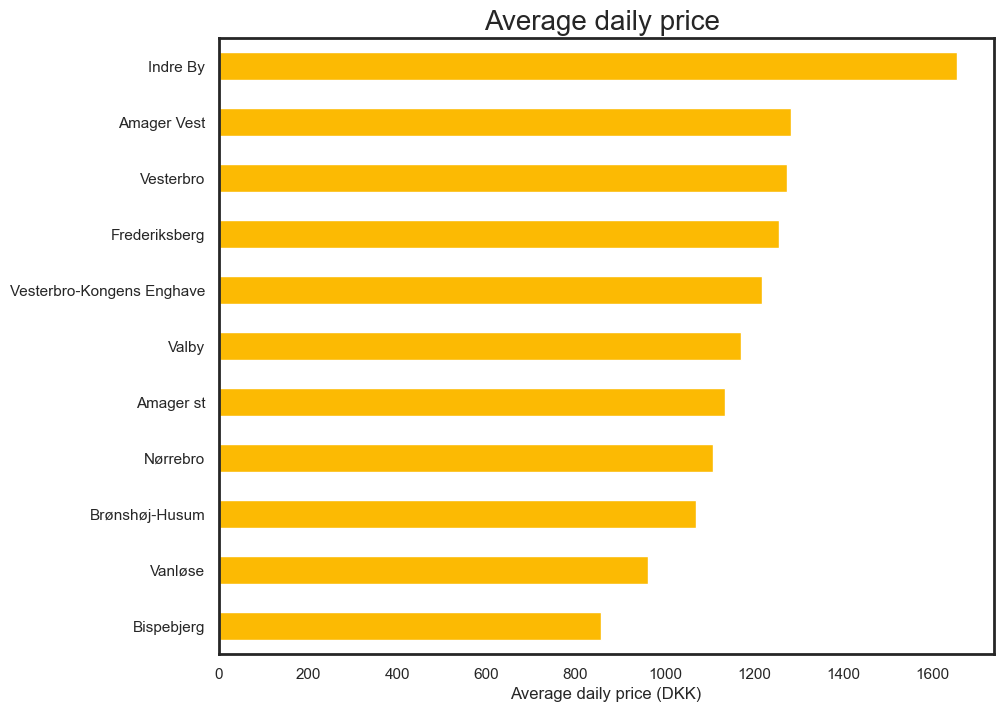

In [47]:
color = "#fcba03"

bargraph = dataframe.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
bargraph.plot.barh(figsize=(10, 8), color=color, width=0.5)
plt.title("Average daily price ", fontsize=20)
plt.xlabel('Average daily price (DKK)', fontsize=12)
plt.ylabel("")
plt.show()

/Users/dan/Library/Python/3.9/lib/python/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dan/Library/Python/3.9/lib/python/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dan/Library/Python/3.9/lib/python/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'DataFrame' object has no attribute 'iteritems'

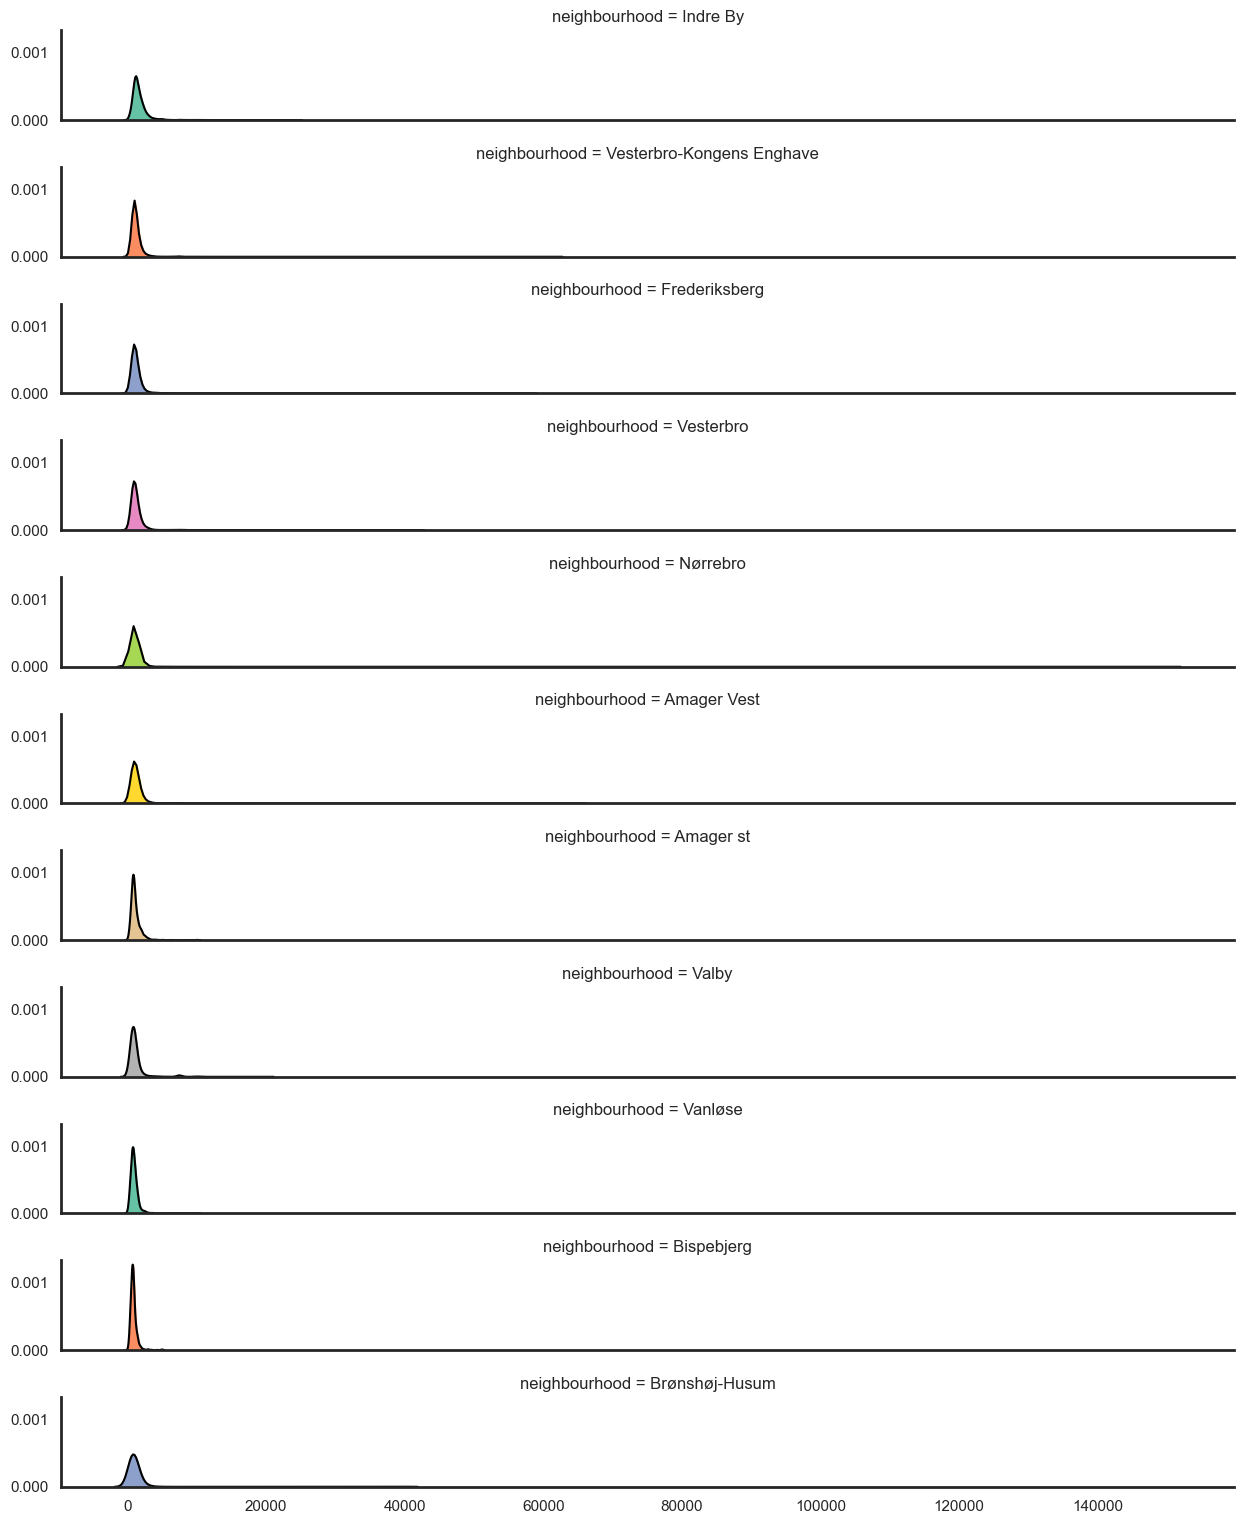

In [48]:
df_filtered = dataframe


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="neighbourhood", hue="neighbourhood", aspect=9, height=1.4)
g.map_dataframe(sns.kdeplot,x="price", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="price", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "neighbourhood")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Prices")
g.despine( left=True)
plt.suptitle('Price density by neighborhoods', y=0.98)
g.set(xlim=(0,4000))
